
<div class="alert alert-block alert-info" style="margin-thttps://op/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01: 20px">
    <ul> <h2>Limpieza de json</h2>
Si bien Json es un formato de texto se podria decir, este esta estructurado de tal forma que puede trabajarse como un diccionario en python
    </ul>
</div>

<div class="alert alert-block alert-info"> Cadena es el Json convertido a diccionario anidado o nested </div>



In [2]:
cadena =  {"applicationID":"1","applicationName":"TEST_FLOW","devEUI":"8788888488883333","deviceName":"FLOW1","timestamp":1635804972,"fCnt":60,"fPort":2,"data":"AXMAAAIDAAADAgAVBGYABY4B","data_encode":"base64","object":{"barometer":0.0,"analogOutput":0.00,"analogInput":0.21,"presence":0},"adr":False,"rxInfo":[{"gatewayID":"ac1f09fffe051aec","loRaSNR":9.8,"rssi":-47,"location":{"latitude":0.000000,"longitude":0.000000,"altitude":0}}],"txInfo":{"frequency":905300000,"dr":3}}

# Limpiamos y extramos datos del formato json
deviceID = cadena ["applicationID"]
app_Name = cadena ["applicationName"]
flujo = cadena["object"]["barometer"]
estado_bomb = cadena["object"]["analogOutput"]

# Podemos ver como llamamos a los objetos de nuestro Formato json
print(f" \t device ID: {deviceID} \n\t Aplicacion: {app_Name}  \n\t El flujo es de: {flujo} Lt \n\t El estado de la bomba es: {estado_bomb}")



 	 device ID: 1 
	 Aplicacion: TEST_FLOW  
	 El flujo es de: 0.0 Lt 
	 El estado de la bomba es: 0.0


### Task to do them: To take and transform a json in python dictionary from a file .json 
<div class="alert alert-block alert-info" style="margin-thttps://op/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01: 20px">

The class device will have to propose to recycle the code structure for many devices, this code structure will must based in the code above.

</div>

```json
{
  "Records": [
    {
      "eventVersion": "2.0",
      "eventSource": "aws:s3",
      "awsRegion": "us-east-1",
      "eventTime": "1970-01-01T00:00:00.000Z",
      "eventName": "ObjectCreated:Put",
      "userIdentity": {
        "principalId": "EXAMPLE"
      },
      "requestParameters": {
        "sourceIPAddress": "127.0.0.1"
      },
      "responseElements": {
        "x-amz-request-id": "EXAMPLE123456789",
        "x-amz-id-2": "EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH"
      },
      "s3": {
        "s3SchemaVersion": "1.0",
        "configurationId": "testConfigRule",
        "bucket": {
          "name": "example-bucket",
          "ownerIdentity": {
            "principalId": "EXAMPLE"
          },
          "arn": "arn:aws:s3:::example-bucket"
        },
        "object": {
          "key": "test%2Fkey",
          "size": 1024,
          "eTag": "0123456789abcdef0123456789abcdef",
          "sequencer": "0A1B2C3D4E5F678901"
        }
      }
    }
  ]
}
```

<div class="alert alert-block alert-info" > The next code is a transform from to json format a python dictionary, this json contain the info about AWS S3 bucket </div>

In [33]:
import urllib.parse

dic = {
  "Records": [
    {
      "eventVersion": "2.0",
      "eventSource": "aws:s3",
      "awsRegion": "us-east-1",
      "eventTime": "1970-01-01T00:00:00.000Z",
      "eventName": "ObjectCreated:Put",
      "userIdentity": {
        "principalId": "EXAMPLE"
      },
      "requestParameters": {
        "sourceIPAddress": "127.0.0.1"
      },
      "responseElements": {
        "x-amz-request-id": "EXAMPLE123456789",
        "x-amz-id-2": "EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH"
      },
      "s3": {
        "s3SchemaVersion": "1.0",
        "configurationId": "testConfigRule",
        "bucket": {
          "name": "example-bucket",
          "ownerIdentity": {
            "principalId": "EXAMPLE"
          },
          "arn": "arn:aws:s3:::example-bucket"
        },
        "object": {
          "key": "factorit.png",
          "size": 1024,
          "eTag": "0123456789abcdef0123456789abcdef",
          "sequencer": "0A1B2C3D4E5F678901"
        }
      }
    }
  ]
}

<div class="alert alert-block alert-info" >Now the data from the json can be proccess from python dictionary, in the following code block, we can see how to access at the data by the dictionary, this example can be aplicated in a lambda function and call an object within some bucket </div>


In [35]:
bucket = dic['Records'][0]['s3']['bucket']['name']

print(bucket)

# take the object, object can be anything wheiter of the bucket for example a image.png
bucket_object_key = dic['Records'][0]['s3']['object']['key']
print(bucket_object_key)

object_size = dic['Records'][0]['s3']['object']['size']
print(object_size)

example-bucket
factorit.png
1024


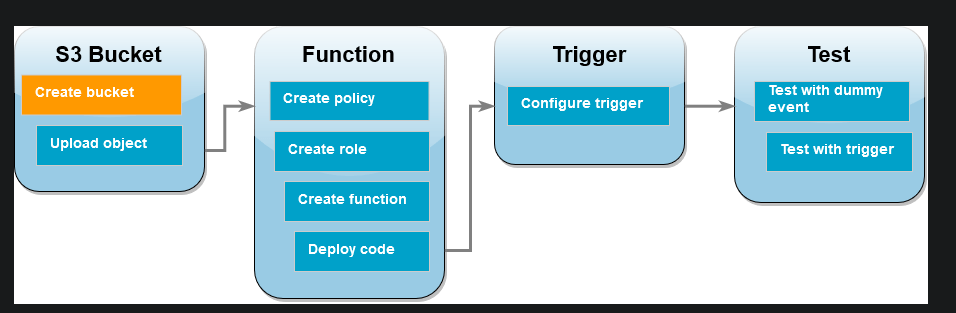
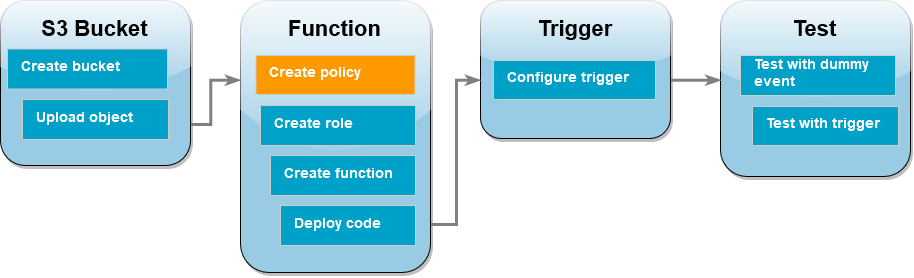

### Lambda function 

```py 
import json
import urllib.parse
import boto3

print('Loading function')

s3 = boto3.client('s3')


def lambda_handler(event, context):
    #print("Received event: " + json.dumps(event, indent=2))

    # Get the object from the event and show its content type
    bucket = event['Records'][0]['s3']['bucket']['name']
    key = urllib.parse.unquote_plus(event['Records'][0]['s3']['object']['key'], encoding='utf-8')
    object_size = event['Records'][0]['s3']['object']['size']
    try:
        response = s3.get_object(Bucket=bucket, Key=key)
        print(f"File name: {key}")
        print("CONTENT TYPE: " + response['ContentType'])
        print(f"Size object: {object_size} ")
        return response['ContentType']
    except Exception as e:
        print(e)
        print('Error getting object {} from bucket {}. Make sure they exist and your bucket is in the same region as this function.'.format(key, bucket))
        raise e
              
```

# Task to do them: To create a class device
<div class="alert alert-block alert-info" style="margin-thttps://op/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01: 20px">
    <ul>
         <li>
            1. The class device will have to propose to recycle the code structure for many devices, this code structure will must based in the code above.
            The input of this class wil must the dictionary created in the previous task.
        </li>
        <li>
            2. Perform a grafica to results about each device created by the class device
        </li>
        <h4>Note: The code must be able to support control exception errors</h4>
    </ul>
</div>


